In [56]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import matplotlib.ticker as ticker
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split 

In [57]:
df = pd.read_csv('honeyproduction.csv')  #data pulled from Kaggle https://www.kaggle.com/jessicali9530/honey-production
col_dict = {'state': "State name abbreviation",
            'numcol': "Number of honey producing colonies",
            'yieldpercol': "Honey yield per colony (lbs)",
            'totalprod': "Total production (numcol*yieldpercol), (lbs)",
            'stocks': "Stocks held by producers on Dec 15 (lbs)",
            'priceperlb': "Average price per pound ($USD)",
            'prodvalue': "Value of production (totalprod*prodvalue), ($)",
            'year': "Year the data pertains to"
           }

In [58]:
print("First 5 rows of data:")
print(df.head()), print()
print("Descriptive stats of columns:")
print(df.describe())

First 5 rows of data:
  state    numcol  yieldpercol   totalprod      stocks  priceperlb  \
0    AL   16000.0           71   1136000.0    159000.0        0.72   
1    AZ   55000.0           60   3300000.0   1485000.0        0.64   
2    AR   53000.0           65   3445000.0   1688000.0        0.59   
3    CA  450000.0           83  37350000.0  12326000.0        0.62   
4    CO   27000.0           72   1944000.0   1594000.0        0.70   

    prodvalue  year  
0    818000.0  1998  
1   2112000.0  1998  
2   2033000.0  1998  
3  23157000.0  1998  
4   1361000.0  1998  

Descriptive stats of columns:
              numcol  yieldpercol     totalprod        stocks  priceperlb  \
count     626.000000   626.000000  6.260000e+02  6.260000e+02  626.000000   
mean    60284.345048    62.009585  4.169086e+06  1.318859e+06    1.409569   
std     91077.087231    19.458754  6.883847e+06  2.272964e+06    0.638599   
min      2000.000000    19.000000  8.400000e+04  8.000000e+03    0.490000   
25%      

['ND', 'CA', 'SD', 'FL', 'MT']


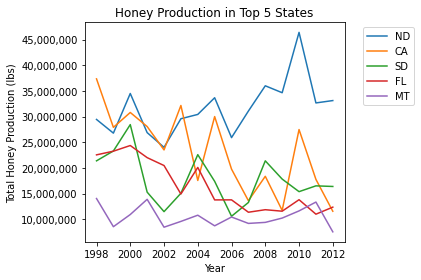

In [59]:
#top 5 honey producing states?  Try groupby state
prod_per_state = df.groupby('state').totalprod.mean().reset_index()
prod_per_state.sort_values(by='totalprod', ascending=False, inplace=True)
#print(prod_per_state.head())

top_5_states = prod_per_state['state'][:5].tolist()
print(top_5_states)

top_5_states_data = df[df.state.isin(top_5_states)]
#print(top_5_states_data.groupby('state').totalprod.mean())

X = top_5_states_data.year.unique()

ax = plt.subplot()
for state_n in top_5_states:
    y = top_5_states_data.loc[top_5_states_data['state']==state_n]['totalprod']
    plt.plot(X, y, label = state_n)
ax.ticklabel_format(axis = 'y', style = 'plain')
ax.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda y, p: format(int(y), ',')))    
plt.xlabel('Year')
plt.ylabel("Total Honey Production (lbs)")
plt.title("Honey Production in Top 5 States")
plt.legend(bbox_to_anchor=(1.05, 1.0))
plt.tight_layout()
plt.savefig('top5states.png')
plt.show()

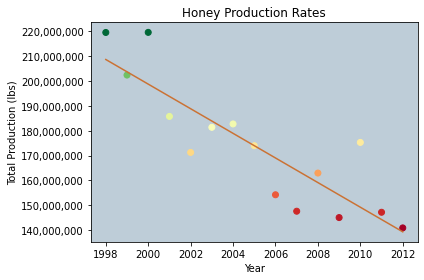

<Figure size 432x288 with 0 Axes>

In [60]:
prod_per_year = df.groupby('year').totalprod.sum().reset_index()

X = prod_per_year.year.values.reshape(-1,1)
y = prod_per_year.totalprod.values.reshape(-1,1)

regr = LinearRegression()
regr.fit(X,y)
y_predict = regr.predict(X)

fig, ax = plt.subplots()
plt.scatter(X, y, c=y, cmap = cm.RdYlGn)
ax.set_facecolor('#BECDD8')
plt.xlabel("Year")
plt.ylabel("Total Production (lbs)")
ax.ticklabel_format(axis = 'y', style = 'plain')
ax.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda y, p: format(int(y), ',')))
plt.title("Honey Production Rates")
plt.plot(X, y_predict, color = "#CB7234")
plt.tight_layout()
plt.savefig('prodbyyear.png')
plt.show()
plt.clf()

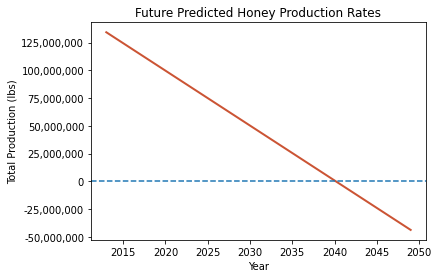

The predicted honey production in 2023 is 84869809.5 pounds.
The predicted honey production in 2035 is 25456438.1 pounds.
This model predicts that honey production will reach 0 in the year 2040 if this trend continues.


<Figure size 432x288 with 0 Axes>

In [61]:
X_future = np.array(range(2013, 2050))
X_future = X_future.reshape(-1,1)
future_predict = regr.predict(X_future).tolist()

fig, ax = plt.subplots()
plt.plot(X_future, future_predict, color = "#CB5434", linewidth=2)
plt.xlabel("Year")
plt.ylabel("Total Production (lbs)")
ax.ticklabel_format(axis = 'y', style = 'plain')
ax.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda y, p: format(int(y), ',')))
plt.axhline(0, linestyle = "--")
plt.title("Future Predicted Honey Production Rates")
plt.savefig('future_prodbyyear.png')
plt.show()
plt.clf()

yrly_prod_m = regr.coef_[0]
yrly_prod_b = regr.intercept_[0]
def get_honey_prod_pred(year):
    honey_prod_pred= (year*yrly_prod_m + yrly_prod_b).round(1)
    print("The predicted honey production in " + str(year) + " is " + str(honey_prod_pred).strip("[]") + " pounds.")
    return honey_prod_pred

get_honey_prod_pred(2023)
get_honey_prod_pred(2035)

out_of_honey = (-1*yrly_prod_b/yrly_prod_m)
print("This model predicts that honey production will reach 0 in the year " + str(int(out_of_honey)) + " if this trend continues.")

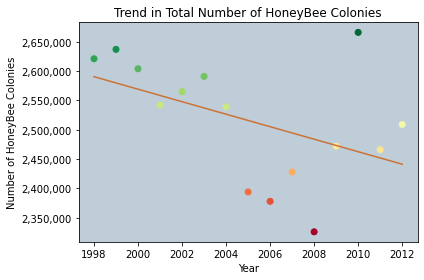

<Figure size 432x288 with 0 Axes>

In [62]:
#Trends in total # of colonies per year
numcol_per_year = df.groupby('year').numcol.sum().reset_index()

X = numcol_per_year.year.values.reshape(-1,1)
y = numcol_per_year.numcol.values.reshape(-1,1)

regr = LinearRegression()
regr.fit(X,y)
y_predict = regr.predict(X)

fig, ax = plt.subplots()
plt.scatter(X, y, c=y, cmap = cm.RdYlGn)
ax.set_facecolor('#BECDD8')
plt.xlabel("Year")
plt.ylabel("Number of HoneyBee Colonies")
ax.ticklabel_format(axis = 'y', style = 'plain')
ax.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda y, p: format(int(y), ',')))
plt.title("Trend in Total Number of HoneyBee Colonies")
plt.plot(X, y_predict, color = "#CB7234")
plt.tight_layout()
plt.savefig('numcolbyyear.png')
plt.show()
plt.clf()

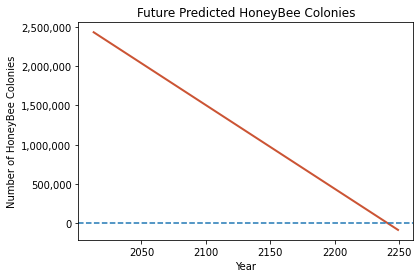

The predicted number of HoneyBee colonies in 2023 is 2324038.1 colonies.
The predicted number of HoneyBee colonies in 2050 is 2036295.2 colonies.
The predicted number of HoneyBee colonies in 2100 is 1503438.1 colonies.
The predicted number of HoneyBee colonies in 2200 is 437723.8 colonies.
This model predicts that the number of colonies will reach 0 in the year 2241 if this trend continues.


<Figure size 432x288 with 0 Axes>

In [63]:
X_future = np.array(range(2013, 2250))
X_future = X_future.reshape(-1,1)
future_predict = regr.predict(X_future).tolist()

fig, ax = plt.subplots()
plt.plot(X_future, future_predict, color = "#CB5434", linewidth=2)
plt.xlabel("Year")
plt.ylabel("Number of HoneyBee Colonies")
ax.ticklabel_format(axis = 'y', style = 'plain')
ax.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda y, p: format(int(y), ',')))
plt.axhline(0, linestyle = "--")
plt.title("Future Predicted HoneyBee Colonies")
plt.savefig('future_numcolbyyear.png')
plt.show()
plt.clf()

yrly_numcol_m = regr.coef_[0]
yrly_numcol_b = regr.intercept_[0]
def get_numcol_pred(year):
    numcol_pred= (year*yrly_numcol_m + yrly_numcol_b).round(1)
    print("The predicted number of HoneyBee colonies in " + str(year) + " is " + str(numcol_pred).strip("[]") + " colonies.")
    return numcol_pred

get_numcol_pred(2023)
get_numcol_pred(2050)
get_numcol_pred(2100)
get_numcol_pred(2200)

out_of_colonies = (-1*yrly_numcol_b/yrly_numcol_m)
print("This model predicts that the number of colonies will reach 0 in the year " + str(int(out_of_colonies)) + " if this trend continues.")

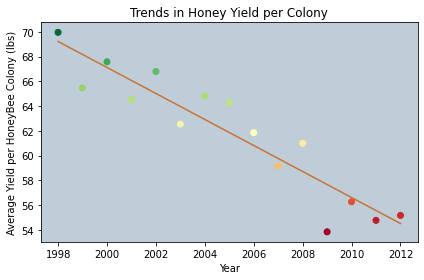

<Figure size 432x288 with 0 Axes>

In [64]:
#Trends in yield per colony per year
ypc_per_year = df.groupby('year').yieldpercol.mean().reset_index()

X = ypc_per_year.year.values.reshape(-1,1)
y = ypc_per_year.yieldpercol.values.reshape(-1,1)

regr = LinearRegression()
regr.fit(X,y)
y_predict = regr.predict(X)

fig, ax = plt.subplots()
plt.scatter(X, y, c=y, cmap = cm.RdYlGn)
ax.set_facecolor('#BECDD8')
plt.xlabel("Year")
plt.ylabel("Average Yield per HoneyBee Colony (lbs)")
ax.ticklabel_format(axis = 'y', style = 'plain')
ax.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda y, p: format(int(y), ',')))
plt.title("Trends in Honey Yield per Colony")
plt.plot(X, y_predict, color = "#CB7234")
plt.tight_layout()
plt.savefig('ypcbyyear.png')
plt.show()
plt.clf()

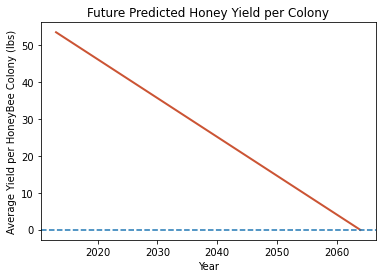

The predicted yield per colony in 2023 is 43. pounds.
The predicted yield per colony in 2050 is 14.6 pounds.
The predicted yield per colony in 2060 is 4.1 pounds.
This model predicts that the average yield per honeybee colony will reach 0 in the year 2063 if this trend continues.


<Figure size 432x288 with 0 Axes>

In [65]:
X_future = np.array(range(2013, 2065))
X_future = X_future.reshape(-1,1)
future_predict = regr.predict(X_future).tolist()

fig, ax = plt.subplots()
plt.plot(X_future, future_predict, color = "#CB5434", linewidth=2)
plt.xlabel("Year")
plt.ylabel("Average Yield per HoneyBee Colony (lbs)")
ax.ticklabel_format(axis = 'y', style = 'plain')
ax.get_yaxis().set_major_formatter(
    ticker.FuncFormatter(lambda y, p: format(int(y), ',')))
plt.axhline(0, linestyle = "--")
plt.title("Future Predicted Honey Yield per Colony")
plt.savefig('future_ypcbyyear.png')
plt.show()
plt.clf()

yrly_ypc_m = regr.coef_[0]
yrly_ypc_b = regr.intercept_[0]
def get_ypc_pred(year):
    ypc_pred= (year*yrly_ypc_m + yrly_ypc_b).round(1)
    print("The predicted yield per colony in " + str(year) + " is " + str(ypc_pred).strip("[]") + " pounds.")
    return ypc_pred

get_ypc_pred(2023)
get_ypc_pred(2050)
get_ypc_pred(2060)

noypc = (-1*yrly_ypc_b/yrly_ypc_m)
print("This model predicts that the average yield per honeybee colony will reach 0 in the year " + str(int(noypc)) + " if this trend continues.")

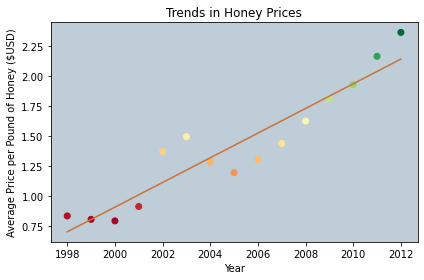

<Figure size 432x288 with 0 Axes>

In [66]:
#Trends in avg honey price per year
price_per_year = df.groupby('year').priceperlb.mean().reset_index()

X = price_per_year.year.values.reshape(-1,1)
y = price_per_year.priceperlb.values.reshape(-1,1)

regr = LinearRegression()
regr.fit(X,y)
y_predict = regr.predict(X)


fig, ax = plt.subplots()
plt.scatter(X, y, c=y, cmap = cm.RdYlGn)
ax.set_facecolor('#BECDD8')
plt.xlabel("Year")
plt.ylabel("Average Price per Pound of Honey ($USD)")
plt.title("Trends in Honey Prices")
plt.plot(X, y_predict, color = "#CB7234")
plt.tight_layout()
plt.savefig('pricebyyear.png')
plt.show()
plt.clf()

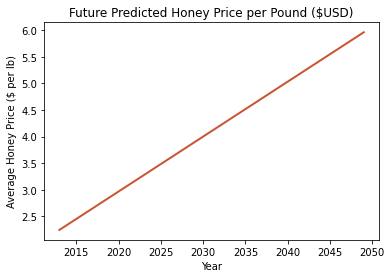

The predicted average price for honey in 2022 is $3.18 per pound.


array([3.18])

<Figure size 432x288 with 0 Axes>

In [67]:
#Keep?
X_future = np.array(range(2013, 2050))
X_future = X_future.reshape(-1,1)
future_predict = regr.predict(X_future).tolist()

fig, ax = plt.subplots()
plt.plot(X_future, future_predict, color = "#CB5434", linewidth=2)
plt.xlabel("Year")
plt.ylabel("Average Honey Price ($ per lb)")
plt.title("Future Predicted Honey Price per Pound ($USD)")
plt.savefig('future_price.png')
plt.show()
plt.clf()

price_m = regr.coef_[0]
price_b = regr.intercept_[0]
def get_price_pred(year):
    price_pred= (year*price_m + price_b).round(2)
    print("The predicted average price for honey in " + str(year) + " is $" + str(price_pred).strip("[]") + " per pound.")
    return price_pred

get_price_pred(2022)


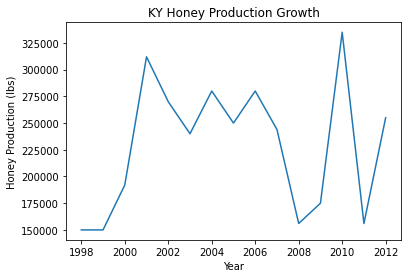

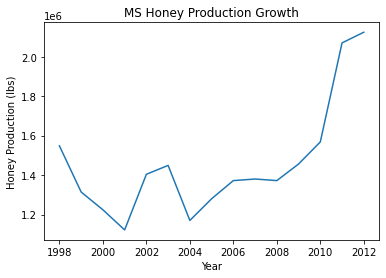

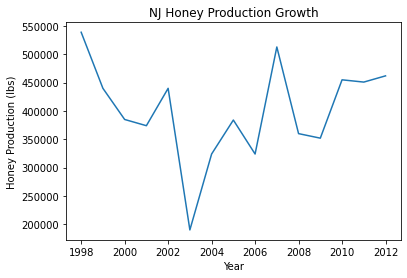

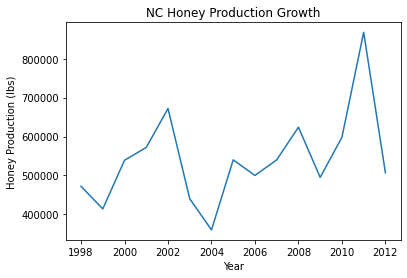

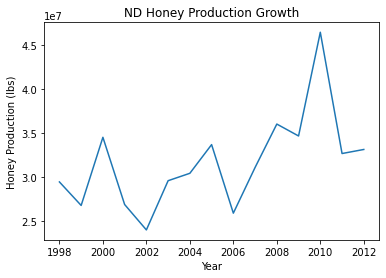

5 States with the best growth in Honey Production (average increase in lbs per year):
   state         growth
26    ND  664928.571429
18    MS   41400.000000
25    NC   11257.142857
13    KY    2157.142857
22    NJ     696.428571
5 States with the worst decline in Honey Production (average decrease in lbs per year):
   state        growth
38    WI -2.618464e+05
17    MN -3.167679e+05
30    SD -4.170214e+05
5     FL -9.956500e+05
3     CA -1.335000e+06


In [68]:
states = df.state.unique()
X = df.year.unique()
#print(states, X)

linear_growth_rate = []

for state_n in states:
    y = df.loc[df['state']== state_n]['totalprod']
    if len(X) == len(y):
        m, b = np.polyfit(X, y, 1)
        #print(state_n, m)
        linear_growth_rate.append([state_n, m])
        if m > 0:
            plt.plot(X, y)
            plt.title(state_n + " Honey Production Growth")
            plt.xlabel("Year")
            plt.ylabel("Honey Production (lbs)")
            plt.savefig(state_n + "prodgrowth.png")
            plt.show()
    #else:
    #    print("not enough data for " + state_n + ".  Length of y: " + str(len(y)))
    
        
linear_growth_rate_df = pd.DataFrame(linear_growth_rate, columns = ['state', 'growth'])
linear_growth_rate_df.sort_values(by='growth', ascending=False, inplace=True)
print("5 States with the best growth in Honey Production (average increase in lbs per year):")
print(linear_growth_rate_df.head())
print("5 States with the worst decline in Honey Production (average decrease in lbs per year):")
print(linear_growth_rate_df.tail())

In [69]:
import plotly.express as px

fig = px.choropleth(linear_growth_rate_df,
                   locations = 'state',
                   color = 'growth',
                   color_continuous_scale='PRGn',
                   color_continuous_midpoint = 0,
                   locationmode = 'USA-states',
                   scope = 'usa')
fig.update_layout(
    title={'text':'Honey Production Growth by State',
           'xanchor':'center',
           'yanchor':'top',
           'x':0.5})
fig.show()

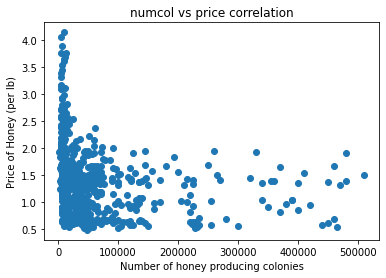

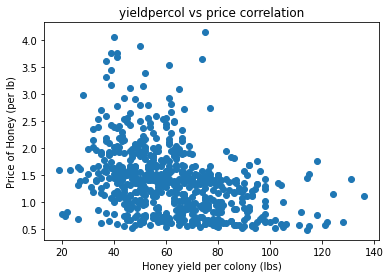

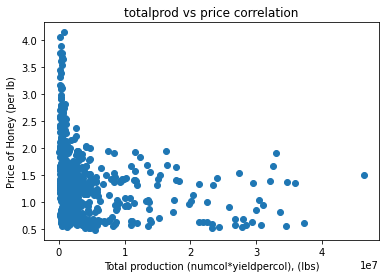

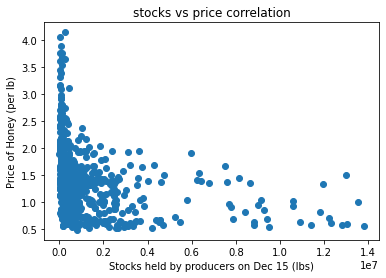

Residual analysis score of training set: 0.18157039186012647
Residual analysis score of test set: 0.14320838401349856
(Not very strong correlation)

Feature coefficients: 
['numcol', 'yieldpercol', 'totalprod', 'stocks']
[[-2.34084959e-06 -1.17446898e-02  4.11917079e-08 -7.56290752e-08]]


In [70]:
#Multiple Linear Regression.  I want to see which feature had the biggest impact on/is the strongest predictor for Honey Prices.
X = df[['numcol', 'yieldpercol', 'totalprod', 'stocks']]
y = df[['priceperlb']]
       
#visualize the correlations between each x variable and the price per pound
for x in X:
    plt.scatter(df[x],y)
    plt.ylabel("Price of Honey (per lb)")
    plt.xlabel(col_dict[x])
    plt.savefig(x+'_price_correlation.png')
    plt.title(x+' vs price correlation')
    plt.show()

#splitting training group from testing group
x_train, x_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2)
    
#create the model       
mlr = LinearRegression() 
mlr.fit(x_train, y_train) 
y_predict = mlr.predict(x_test)

print("Residual analysis score of training set: " + str(mlr.score(x_train,y_train)))
print("Residual analysis score of test set: " + str(mlr.score(x_test,y_test)))
if mlr.score(x_test,y_test) < 0.8:
    print("(Not very strong correlation)")
else:
    print("(Fairly strong correlation)")

print()

print("Feature coefficients: ")
print(X.columns.tolist())
print(mlr.coef_)